In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

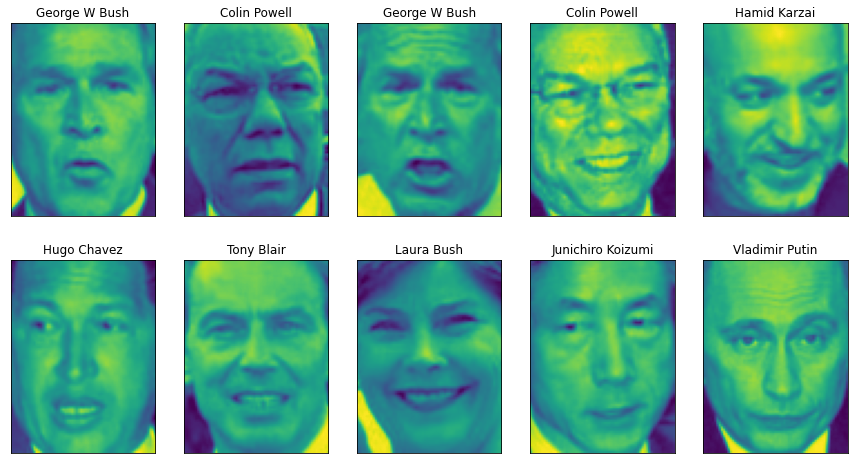

In [3]:
fix,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks': (),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
people.images.shape

(2489, 87, 65)

In [5]:
print("Number of Classes: {}".format(len(people.target_names)))

Number of Classes: 43


In [6]:
counts = np.bincount(people.target)
for i,(count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if(i+1)%3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Ariel Sharon               77 Atal Bihari Vajpayee       24 
Bill Clinton               29 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Hamid Karzai               22 Hans Blix                  39 Hugo Chavez                71 
Igor Ivanov                20 Jack Straw                 28 Jacques Chirac             52 
Jean Chretien              55 Jennifer Aniston           21 Jennifer Capriati          42 
John Ashcroft              53 Juan Carlos Ferrero        28 Junichiro Koizumi          60 
Kofi Annan                 32 Laura Bush                 41 Lindsay Davenport          22 
Lleyton Hewitt             41 Megawati Sukarnoputri      33 Michael Bloomberg          20 

In [7]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify = y_people,random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn: 0.27


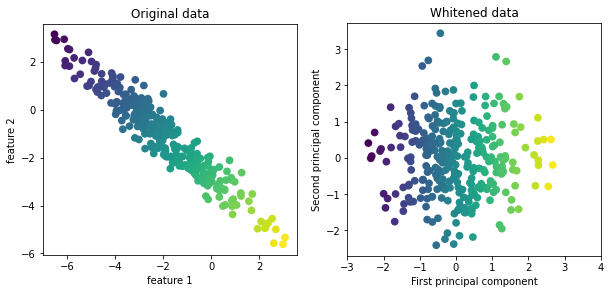

In [9]:
import mglearn
mglearn.plots.plot_pca_whitening()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1146, 100)


In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


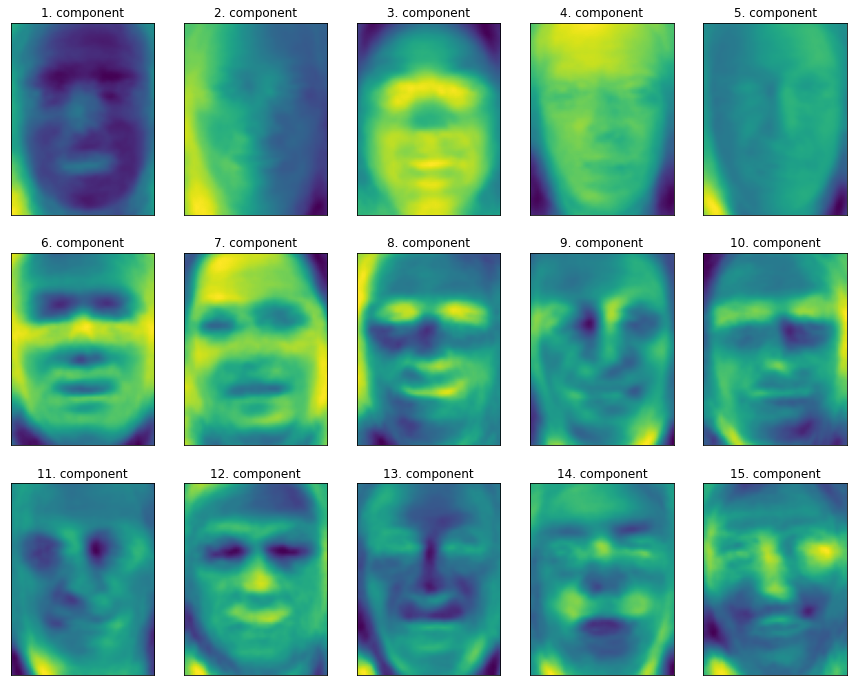

In [14]:
fix,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (),'yticks': ()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap = 'viridis')
    ax.set_title("{}. component".format((i+1)))

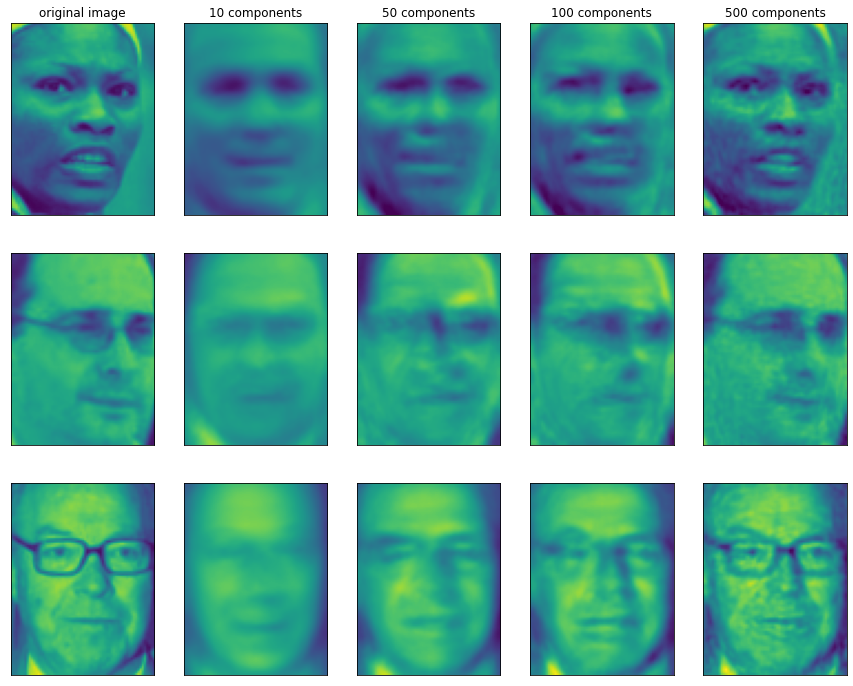

In [15]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Second principal component')

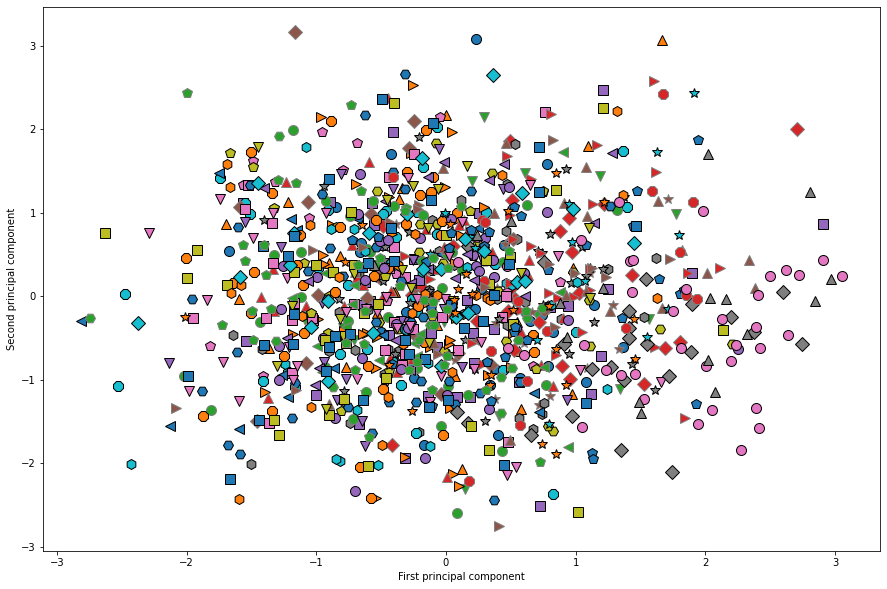

In [16]:
plt.figure(figsize=(15,10))
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')